## MSDM5058 -- Classification: Training a decision tree

`sklearn.datasets.load_digits` is a dataset of 8 by 8 images of numbers.
In this example, we will train a decision tree classifier with sklearn and tune the parameter to get better accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Run the following code to get your training data and test data
seed = 0
import sklearn.datasets
from sklearn.model_selection import train_test_split
Load_digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(Load_digits.data,
                                                    Load_digits.target, 
                                                    test_size=0.2, 
                                                    random_state=seed)

Length of training set = 1437      Length of test set =  360

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] [0 1 2 3 4 5 6 7 8 9]


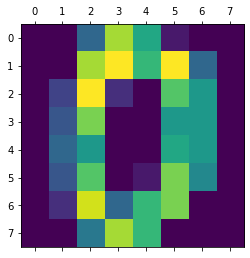

In [3]:
# Take a first look of feature names, target names, length of the datasets, and some of the images

print("Length of training set =", len(y_train), "     Length of test set = ", len(y_test))
print()
print(Load_digits.feature_names, Load_digits.target_names)

plt.matshow(Load_digits.images[0])    # Show the first digit image
plt.show()

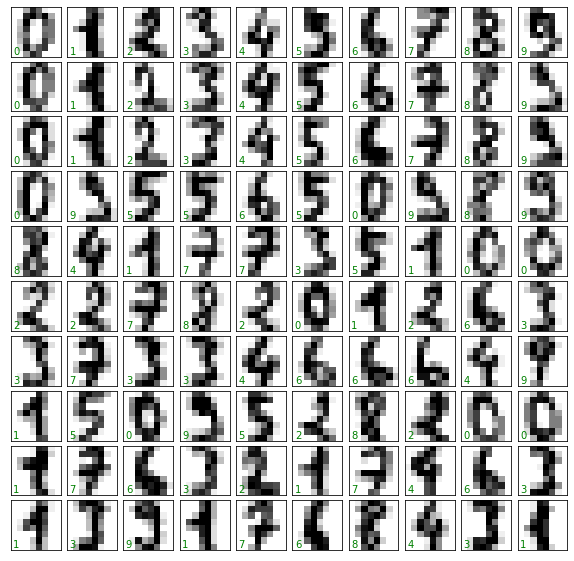

In [4]:
# Show some of the digit images in the dataset

fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(Load_digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(Load_digits.target[i]),
        transform=ax.transAxes, color='green')

In [5]:
# 1. import model from sklearn
# We use a seed here (defined in cell 2) for verification purpose in the future.

from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=seed)

In [6]:
# Train the model with X_train and y_train

clf = clf.fit(X_train, y_train)
max_score = clf.score(X_test, y_test)
max_depth = clf.get_depth()
max_leaves = clf.get_n_leaves()
print("Test score =", max_score, "  Depth = ", max_depth, "  Number of leaves =", max_leaves)

Test score = 0.8472222222222222   Depth =  13   Number of leaves = 139


In [7]:
# Print out the text representation of the decision tree

digits_train_tree_text = tree.export_text(clf)
# print(digits_train_tree_text)

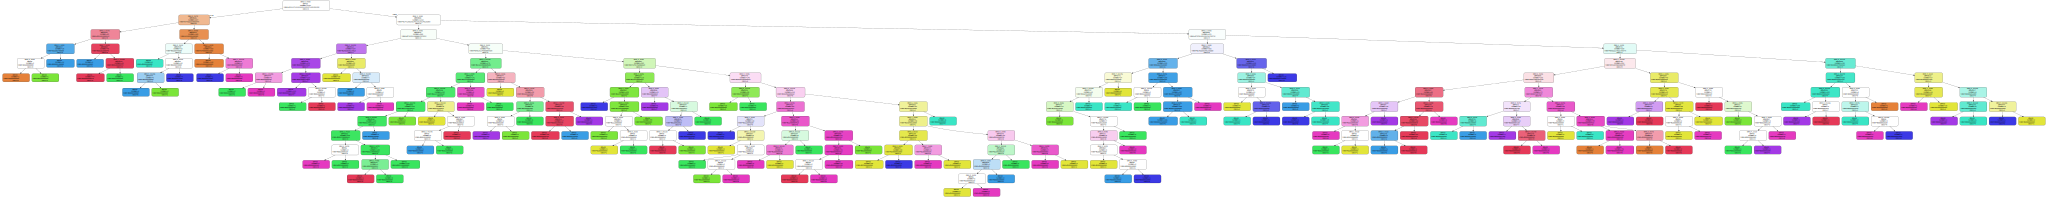

In [8]:
# Draw the decision tree. Need to define the target names as a list of string first.
target = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

import graphviz
from IPython.display import Image
digits_train_result = tree.export_graphviz(clf, out_file=None, 
                                feature_names=Load_digits.feature_names,  
                                class_names=target,  
                                filled=True, rounded=True,  
                                 special_characters=True)  
digits_train_tree = graphviz.Source(digits_train_result, format = 'png')  
digits_train_tree

In [9]:
# Save the decision tree as a "png" file.

digits_train_tree.render("digits_train_decision_tree")

'digits_train_decision_tree.png'

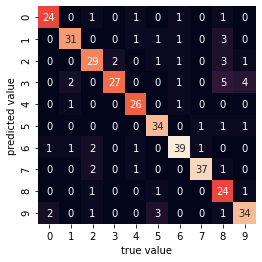

In [10]:
# Import the confusion matrix and show the result with a heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predict = clf.predict(X_test)
confusion_matrix(y_predict, y_test)

mat = confusion_matrix(y_predict, y_test)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('true value')
plt.ylabel('predicted value');

In [11]:
# Show a Confusion Matrix with two classes

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png")

In [12]:
# Import and print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.84      0.89      0.86        35
           2       0.78      0.81      0.79        36
           3       0.69      0.93      0.79        29
           4       0.93      0.87      0.90        30
           5       0.92      0.85      0.88        40
           6       0.87      0.89      0.88        44
           7       0.90      0.95      0.92        39
           8       0.89      0.62      0.73        39
           9       0.83      0.83      0.83        41

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



There are several parameters to tune in a decision tree model, (e.g., `max_depth`, `max_features`, `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split`). Try to tune the model by choosing the values for 1 ~ 3 parameters using cross validation. 

__** We here try some of "max_depth, max_features, max_leaf_nodes, min_samples_leaf, min_samples_split" first, then pick combinations of 3 parameters and use for tunning. For cross validation, we use GridSearchCV from Sklearn, which can help us perform cross validation automatically with a set of hyperparameters.__

In [13]:
# Load GridSearchCV first

from sklearn.model_selection import GridSearchCV

# Try to find the accuracy_score for a set of max_leaf_nodes
tuned_parameters = [{'max_leaf_nodes': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        tree.DecisionTreeClassifier(random_state=seed, min_impurity_decrease=0.001), 
        tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.5f} (+/-{std*2:0.05f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_leaf_nodes': 100}

Grid scores on development set:
0.78486 (+/-0.06355) for {'max_leaf_nodes': 20}
0.82064 (+/-0.05632) for {'max_leaf_nodes': 30}
0.83477 (+/-0.05559) for {'max_leaf_nodes': 40}
0.83186 (+/-0.05834) for {'max_leaf_nodes': 50}
0.83593 (+/-0.05016) for {'max_leaf_nodes': 60}
0.84464 (+/-0.04032) for {'max_leaf_nodes': 70}
0.84475 (+/-0.04022) for {'max_leaf_nodes': 80}
0.84606 (+/-0.04870) for {'max_leaf_nodes': 90}
0.84744 (+/-0.04632) for {'max_leaf_nodes': 100}
0.84742 (+/-0.04632) for {'max_leaf_nodes': 110}
0.84742 (+/-0.04632) for {'max_leaf_nodes': 120}


__** Setting the maximum number of leaves = 120, we find the best performace is with 100 leaves and the score improves. So one can use a simpler tree instead.__

### Now we try to tune the model by choosing combination of parameters. We here choose max_depth, max_features, max_leaf_nodes, min_samples_leaf, min_samples_split and try several combinations of three parameters from these five parameters in order to improve the results further, i.e., by reducing the number of nodes and leaves, resulting in a simpler tree. The initial result in the beginning is having a tree with depth = 13 and number of leaves = 139.

In [14]:
# 5. Show the best result
# Now try some different combinations and perform a cross-validation check
# Let's try the case with max_depth, min_samples_split and max_leaf_nodes first.
# Since we want a simpler tree, we set the maximum depth = 10 and maximum number of leaves = 100.

tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4],
                     'max_leaf_nodes' : [30, 40, 50, 60, 70, 80, 90, 100]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        tree.DecisionTreeClassifier(random_state=seed, min_impurity_decrease=0.001), 
        tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.5f} (+/-{std*2:0.05f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_leaf': 1}

Grid scores on development set:
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_leaf': 1}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_leaf': 3}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_leaf': 4}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 40, 'min_samples_leaf': 1}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 40, 'min_samples_leaf': 2}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 40, 'min_samples_leaf': 3}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 40, 'min_samples_leaf': 4}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
0.19671 (+/-0.00587) for {'max_depth'

__**Here, we get the best result with {'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_leaf': 1} and a score 0.84768__

In [15]:
# Now try another different combinations and perform a cross-validation check
# Let's try the case with max_depth, min_samples_split and max_leaf_nodes first.
# Since we want a simpler tree, we set the maximum depth = 10 and maximum number of leaves = 100.

tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10], 
                     'min_samples_split': [2,3,4,5,6,7,8,9,10],
                     'max_leaf_nodes' : [30, 40, 50, 60, 70, 80, 90, 100]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        tree.DecisionTreeClassifier(random_state=seed, min_impurity_decrease=0.001), 
        tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.5f} (+/-{std*2:0.05f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_split': 4}

Grid scores on development set:
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 2}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 3}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 4}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 5}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 6}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 7}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 8}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 9}
0.19671 (+/-0.00587) for {'max_depth': 1, 'max_leaf_nodes': 30, 'min_samples_split': 10}
0.19671 (+/-0.00587) for {

__**Here, we get the best result with {'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_split': 4} and a score 0.84833__

__Now try to visualize the decision tree interactively__

In [16]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

In [17]:
def plot_tree(crit, split, depth, sample_split, sample_leaf, feature, leaf):
    estimator = tree.DecisionTreeClassifier(random_state = seed 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split = sample_split
      , min_samples_leaf = sample_leaf
      , max_features = feature
      , max_leaf_nodes = leaf, min_impurity_decrease=0.001)
    estimator.fit(X_train, y_train)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=Load_digits.feature_names
      , class_names=target
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator

In [18]:
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
   , sample_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
   , sample_leaf = [1, 2, 3, 4]
   , feature = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
   , leaf = [30, 40, 50, 60, 70, 80, 90, 100])

In [19]:
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### We now perform a post pruning check by using "cost_complexity_pruning_path" from Sklearn. The total cost, C(T), is: $\, \, \, $ C(T) = Error(T) + $\lambda$ L(T)

In [20]:
# Try the post pruning method first for the original training dataset without picking any parameter
# set from max_depth, max_features, max_leaf_nodes, min_samples_leaf, min_samples_split
clf = tree.DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score, test_score, clf.get_depth(), clf.get_n_leaves())
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_lambdas, impurities = path.ccp_alphas, path.impurities
ccp_lambdas, impurities, len(ccp_lambdas)

1.0 0.8472222222222222 13 139


(array([0.        , 0.00067805, 0.00067971, 0.00068734, 0.00069589,
        0.00069589, 0.00069589, 0.00069589, 0.00069589, 0.00069589,
        0.00069589, 0.00069589, 0.00069589, 0.00069589, 0.00069589,
        0.00069589, 0.00069589, 0.00069589, 0.00092786, 0.00092786,
        0.00092786, 0.00092786, 0.00104384, 0.00104384, 0.00104384,
        0.00104384, 0.00104384, 0.00111343, 0.00111343, 0.00115982,
        0.00115982, 0.00115982, 0.00115982, 0.00115982, 0.00119296,
        0.00123715, 0.00125261, 0.00127249, 0.00127249, 0.00127581,
        0.00127581, 0.0013222 , 0.00132926, 0.0013454 , 0.0013464 ,
        0.00135085, 0.00135165, 0.00135278, 0.00136153, 0.00137228,
        0.00139179, 0.00139179, 0.00139179, 0.00156576, 0.00160688,
        0.00164032, 0.00173974, 0.0017784 , 0.00178944, 0.00182672,
        0.00185572, 0.00185572, 0.00191371, 0.00198625, 0.00204675,
        0.00205138, 0.00220532, 0.00222686, 0.00226166, 0.00230903,
        0.00247429, 0.00248534, 0.00250522, 0.00

In [21]:
clfs = []
for lamb in ccp_lambdas:
    clf = tree.DecisionTreeClassifier(random_state=seed, ccp_alpha=lamb)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_lambdas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0676264133951382


__Number of nodes in the last tree is: 1 with ccp_alpha: 0.0676264133951382 and a depth of: 0__

In [22]:
clfs = clfs[:-1]
ccp_lambdas = ccp_lambdas[:-1]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

for i in range(len(ccp_lambdas)):
    print("training score =", round(train_scores[i],6), " test score =", round(test_scores[i],6), 
          "  lambda =", round(ccp_lambdas[i],6), " #nodes =", clfs[i].tree_.node_count, 
          " #leaves =", clfs[i].get_n_leaves())

training score = 1.0  test score = 0.847222   lambda = 0.0  #nodes = 277  #leaves = 139
training score = 0.999304  test score = 0.847222   lambda = 0.000678  #nodes = 273  #leaves = 137
training score = 0.998608  test score = 0.85   lambda = 0.00068  #nodes = 269  #leaves = 135
training score = 0.997216  test score = 0.85   lambda = 0.000687  #nodes = 261  #leaves = 131
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score = 0.852778   lambda = 0.000696  #nodes = 223  #leaves = 112
training score = 0.983994  test score =

__**The post pruning method gives the best test score = 0.861111 with 76 leaves and $\lambda = 0.001372$. This is better than the original tree (139 leaves) without post pruning.__

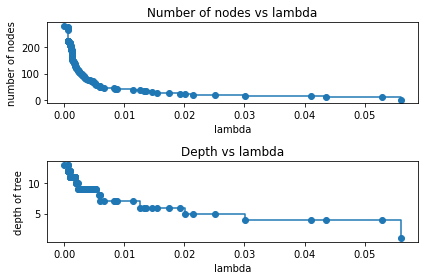

In [23]:
# The number of nodes and depth of tree vs. lambda

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_lambdas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("lambda")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs lambda")
ax[1].plot(ccp_lambdas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("lambda")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs lambda")
fig.tight_layout()

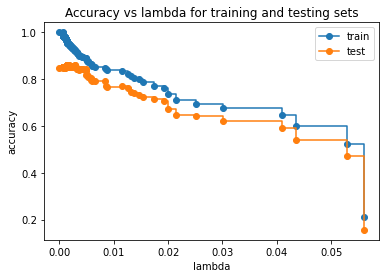

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel("lambda")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs lambda for training and testing sets")
ax.plot(ccp_lambdas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_lambdas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()